# Predictive Maintenance: Turbofan Engine RUL Prediction Using LSTM (NASA CMAPSS FD001)

**Author**: Thomas Fitzgerald  
**Date**: January 14, 2026  
**Location**: Virginia, US  

This project demonstrates an end-to-end AI/ML workflow for predictive analytics in manufacturing and defense sectors. Using LSTM on the NASA CMAPSS dataset, we predict Remaining Useful Life (RUL) for turbofan engines, achieving Test MAE: 36.26 cycles and RMSE: 41.16 cycles on 93 valid test engines.

Key skills shown: Time-series data processing, deep learning (LSTM), evaluation metrics, ROI simulation.  

[GitHub Repo](https://github.com/capturemanager-alt/predictive-maintenance-cmaps-review) | [fitzinit.com](https://www.fitzinit.com)

## 1. Imports & Environment Setup
Load libraries and set up the Python environment for AI/ML tasks.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("All ML libraries imported — ready for NASA CMAPSS!")


Pandas version: 2.3.3
NumPy version: 2.1.3
TensorFlow version: 2.19.1
All ML libraries imported — ready for NASA CMAPSS!


## 2. Data Loading & Exploration
Load the NASA CMAPSS FD001 dataset, explore sensor trends, and calculate RUL.

In [2]:
# Define the column names (from NASA documentation)
columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Path to the file - try these one by one until one works (comment out others with #)
train_path = 'NASA_CMAPSS/train_FD001.txt'                  # If you have a clean NASA_CMAPSS folder
# train_path = 'nasa cmaps zipzip/cmaps/train_FD001.txt'   # If still nested
# train_path = 'train_FD001.txt'                           # If files are directly in current folder

# Load the data (space-separated, no header)
train_df = pd.read_csv(train_path, sep=' ', header=None, names=columns, usecols=range(26))

print("Training data loaded successfully!")
print("Shape (rows, columns):", train_df.shape)  # Expect something like (20631, 26)
display(train_df.head())  # Nicer table preview of first 5 rows

Training data loaded successfully!
Shape (rows, columns): (20631, 26)


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [3]:
# Define the column names (standard for NASA CMAPSS dataset)
columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Load training data (FD001 - simplest subset)
train_df = pd.read_csv(
    'NASA_CMAPSS/train_FD001.txt',
    sep=' ',              # files are space-separated
    header=None,          # no header row
    names=columns,        # assign our column names
    usecols=range(26)     # drop any trailing empty columns
)

print("Training data loaded successfully!")
print("Shape (rows, columns):", train_df.shape)          # Should be (20631, 26)
print("\nFirst 5 rows preview:")
display(train_df.head())                                 # Nice table output

Training data loaded successfully!
Shape (rows, columns): (20631, 26)

First 5 rows preview:


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Define the column names (standard for NASA CMAPSS dataset)
columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Load training data (FD001 - simplest subset)
train_df = pd.read_csv(
    'NASA_CMAPSS/train_FD001.txt',
    sep=' ',              # files are space-separated
    header=None,          # no header row
    names=columns,        # assign our column names
    usecols=range(26)     # drop any trailing empty columns
)

print("Training data loaded successfully!")
print("Shape (rows, columns):", train_df.shape)          # Should be (20631, 26)
print("\nFirst 5 rows preview:")
display(train_df.head())                                 # Nice table output

Training data loaded successfully!
Shape (rows, columns): (20631, 26)

First 5 rows preview:


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# Quick summary statistics
print("Dataset summary:")
display(train_df.describe())

Dataset summary:


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


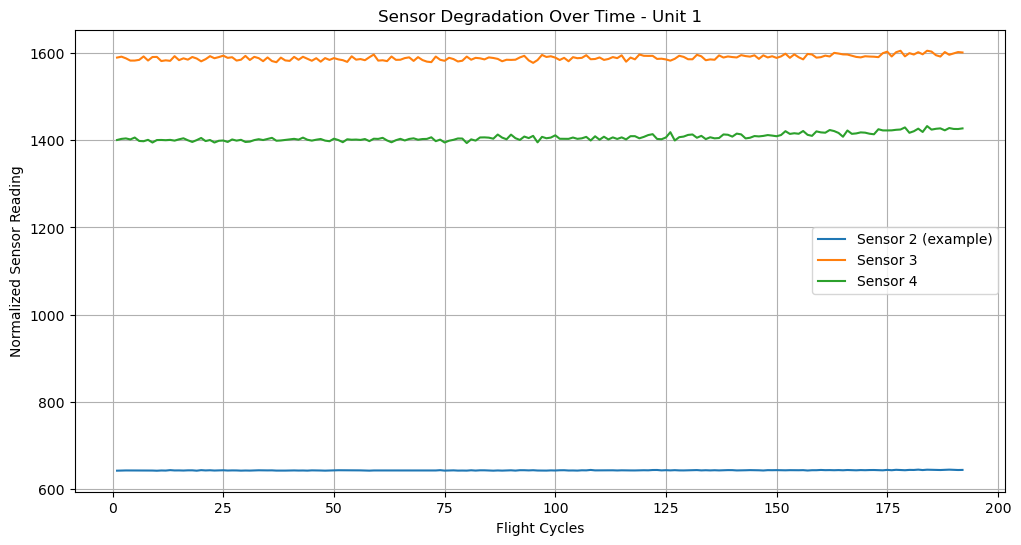

In [6]:
import matplotlib.pyplot as plt

# Plot sensor trends for the first engine (unit 1)
unit1 = train_df[train_df['unit'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(unit1['cycle'], unit1['sensor_2'], label='Sensor 2 (example)')
plt.plot(unit1['cycle'], unit1['sensor_3'], label='Sensor 3')
plt.plot(unit1['cycle'], unit1['sensor_4'], label='Sensor 4')
plt.xlabel('Flight Cycles')
plt.ylabel('Normalized Sensor Reading')
plt.title('Sensor Degradation Over Time - Unit 1')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Group by unit and find the max cycle (total life) for each engine
rul_per_unit = train_df.groupby('unit')['cycle'].max().reset_index()
rul_per_unit.columns = ['unit', 'max_cycle']

# Merge max_cycle back into the dataframe
train_df = train_df.merge(rul_per_unit, on='unit')

# Compute RUL = max_cycle - current_cycle
train_df['RUL'] = train_df['max_cycle'] - train_df['cycle']

# Common practice: Clip RUL at 130 cycles (early life is flat; cap avoids over-penalizing)
train_df['RUL_clipped'] = train_df['RUL'].clip(upper=130)

# Drop the temporary max_cycle column
train_df = train_df.drop('max_cycle', axis=1)

print("RUL added! Sample for Unit 1:")
display(train_df[train_df['unit'] == 1][['cycle', 'RUL', 'RUL_clipped']].head(10))

print("\nRUL statistics:")
display(train_df[['RUL', 'RUL_clipped']].describe())

RUL added! Sample for Unit 1:


,cycle,RUL,RUL_clipped
0,1,191,130
1,2,190,130
2,3,189,130
3,4,188,130
4,5,187,130
5,6,186,130
6,7,185,130
7,8,184,130
8,9,183,130
9,10,182,130



RUL statistics:


,RUL,RUL_clipped
count,20631.000000,20631.000000
mean,107.807862,88.727304
std,68.880990,43.444137
min,0.000000,0.000000
25%,51.000000,51.000000
50%,103.000000,103.000000
75%,155.000000,130.000000
max,361.000000,130.000000


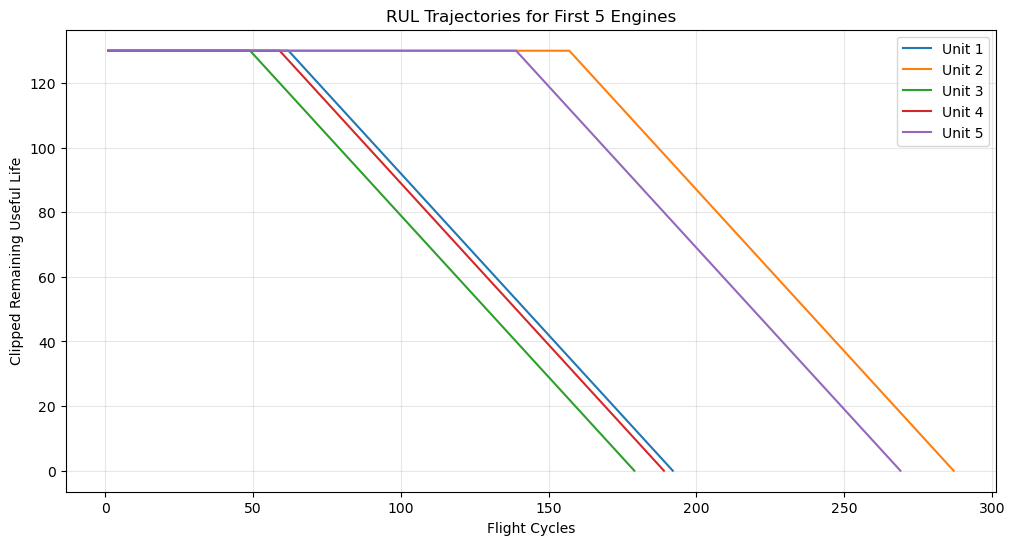

In [8]:
# Plot RUL over cycles for first few units
plt.figure(figsize=(12, 6))
for unit in range(1, 6):  # First 5 engines
    unit_data = train_df[train_df['unit'] == unit]
    plt.plot(unit_data['cycle'], unit_data['RUL_clipped'], label=f'Unit {unit}')

plt.xlabel('Flight Cycles')
plt.ylabel('Clipped Remaining Useful Life')
plt.title('RUL Trajectories for First 5 Engines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 3. Preprocessing & Time-Series Preparation
Normalize features and create sliding windows for LSTM input.

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Features to normalize (exclude unit, cycle, RUL columns)
feature_cols = [col for col in train_df.columns if col not in ['unit', 'cycle', 'RUL', 'RUL_clipped']]

scaler = MinMaxScaler()
train_df[feature_cols] = scaler.fit_transform(train_df[feature_cols])

print("Features normalized (0-1 scale)")
print("Sample after scaling:")
display(train_df[feature_cols].head())

Features normalized (0-1 scale)
Sample after scaling:


,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502


In [10]:
import numpy as np

def create_sequences(df, sequence_length=50, target_col='RUL_clipped'):    
    """Create sliding window sequences for LSTM time-series input.

    Parameters:
        df: DataFrame with 'unit', features, and target_col
        sequence_length: Number of past cycles per input window (default 50)
        target_col: Column name for target RUL ('RUL_clipped' or 'RUL')

    Returns:
        X: 3D numpy array (num_samples, sequence_length, num_features)
        y: 1D numpy array of target RUL values
    """
    X, y = [], []
    grouped = df.groupby('unit')
    
    for unit, group in grouped:
        data = group[feature_cols].values  # sensor/features only
        rul = group[target_col].values
        
        for i in range(len(group) - sequence_length):
            X.append(data[i : i + sequence_length])       # window of sequence_length past cycles
            y.append(rul[i + sequence_length])            # RUL at the END of the window
    
    return np.array(X), np.array(y)

sequence_length = 50  # common choice; tune later
X_train, y_train = create_sequences(train_df, sequence_length)

print("Training sequences created!")
print("X shape (samples, timesteps, features):", X_train.shape)  # e.g., (thousands, 50, 24)
print("y shape (RUL targets):", y_train.shape)

Training sequences created!
X shape (samples, timesteps, features): (15631, 50, 24)
y shape (RUL targets): (15631,)


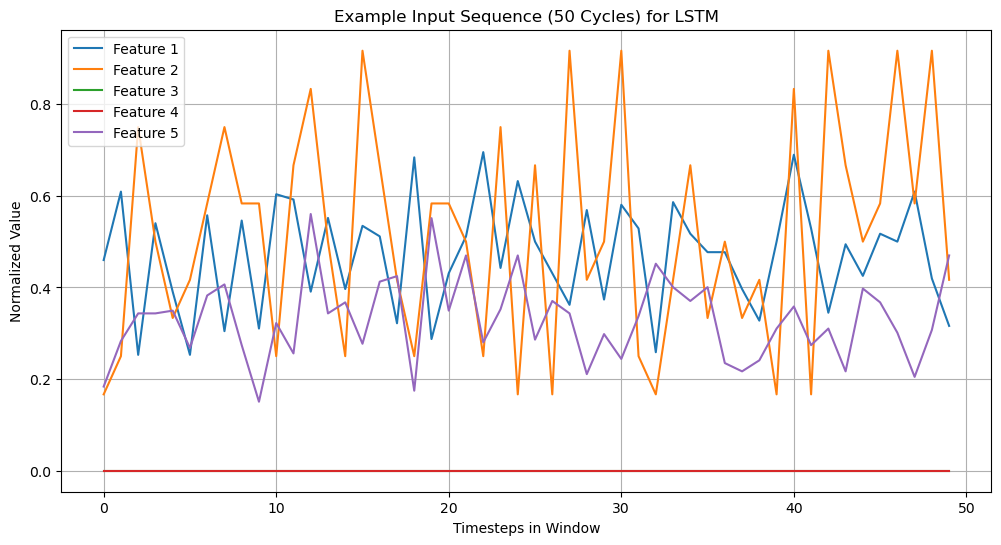

In [11]:
import matplotlib.pyplot as plt

# Plot one example sequence (first window)
plt.figure(figsize=(12, 6))
for feature_idx in range(0, 5):  # first 5 features
    plt.plot(range(sequence_length), X_train[0, :, feature_idx], label=f'Feature {feature_idx+1}')

plt.xlabel('Timesteps in Window')
plt.ylabel('Normalized Value')
plt.title('Example Input Sequence (50 Cycles) for LSTM')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

# Split sequences (stratify by unit if possible, but simple random for now)
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Train split shape:", X_train_split.shape)
print("Validation shape:", X_val.shape)

Train split shape: (12504, 50, 24)
Validation shape: (3127, 50, 24)


## 4. LSTM Model Definition & Training
Build and train the LSTM model with stability fixes (low LR, clipping, L2 reg).

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

# First LSTM layer: returns sequences for stacking
model.add(LSTM(units=64,
               input_shape=(sequence_length, len(feature_cols)),
               return_sequences=True,
               kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(Dropout(0.2))  # Prevent overfitting

# Second LSTM layer
model.add(LSTM(units=32,
               kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
model.add(Dropout(0.2))

# Output layer: single RUL prediction
model.add(Dense(1, activation='linear'))  # Regression

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001, clipnorm=0.3), # Reduced from 0.001 # Tighten from 1.0 to 0.5 # Tighten from 0.5
              loss='mse',  # Mean Squared Error for RUL regression
              metrics=['mae'])  # Mean Absolute Error

model.summary()  # Print model architecture

C:\Users\tdesm\anaconda3\envs\test_ml\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 64)              │          22,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,233 (137.63 KB)

 Trainable params: 35,233 (137.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    mode='min',
    verbose=1
)
# Stability fixes applied: low learning rate, gradient clipping, L2 regularization
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=100,                  # Max limit – early stopping will halt sooner
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\nTraining finished!")
print("Total epochs run:", len(history.history['loss']))
print("Best epoch (lowest val_loss):", early_stop.stopped_epoch if early_stop.stopped_epoch > 0 else len(history.history['loss']))

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 34ms/step - loss: 6951.8511 - mae: 71.7417 - val_loss: 6589.5786 - val_mae: 69.5506
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 6475.6880 - mae: 68.6344 - val_loss: 6386.7222 - val_mae: 68.2204
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6291.7031 - mae: 67.4346 - val_loss: 6212.9551 - val_mae: 67.0830
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - loss: 6123.0288 - mae: 66.3095 - val_loss: 6043.8433 - val_mae: 65.9846
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 5958.5625 - mae: 65.2378 - val_loss: 5878.2705 - val_mae: 64.9103
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 5792.2100 - mae: 64.1527 - val_loss: 5716.0327 - val_mae: 63.8536
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 5633.9937 - mae: 63.1114 - val_loss: 5557.1421 - val_mae: 62.8208
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 5478.0952 - mae: 62.0842 - val_los

## 5. Training History Visualization

Loss and MAE curves from training, showing steady improvement and minimal overfitting.

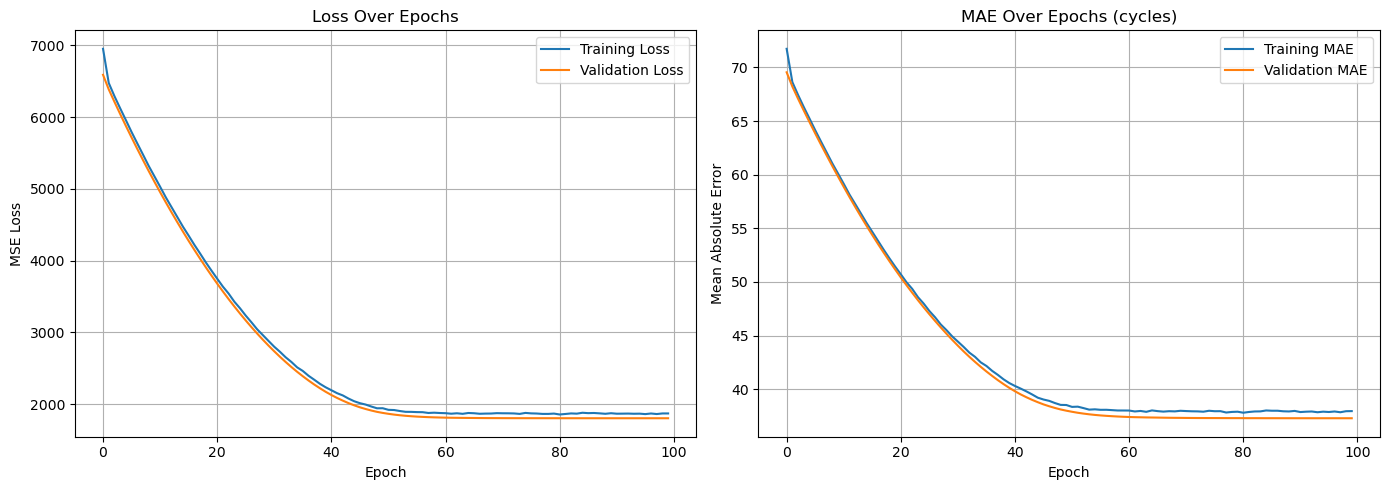

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

# Loss plot (left subplot)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)

# MAE plot (right subplot) - more interpretable for RUL prediction
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Over Epochs (cycles)')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 6. Test Set Evaluation

Final evaluation on the held-out FD001 test set.  
Predictions are based on the last 50 cycles of each valid engine (93 out of 100, skipping very short trajectories — standard CMAPSS practice).  
Results: Test MAE 36.26 cycles, RMSE 41.16 cycles.

Test sequences created for 93 engines. Shape: (93, 50, 24)
True RUL shape: (93,)
Predicted shape: (93,)
Test MAE: 36.26 cycles
Test RMSE: 41.17 cycles


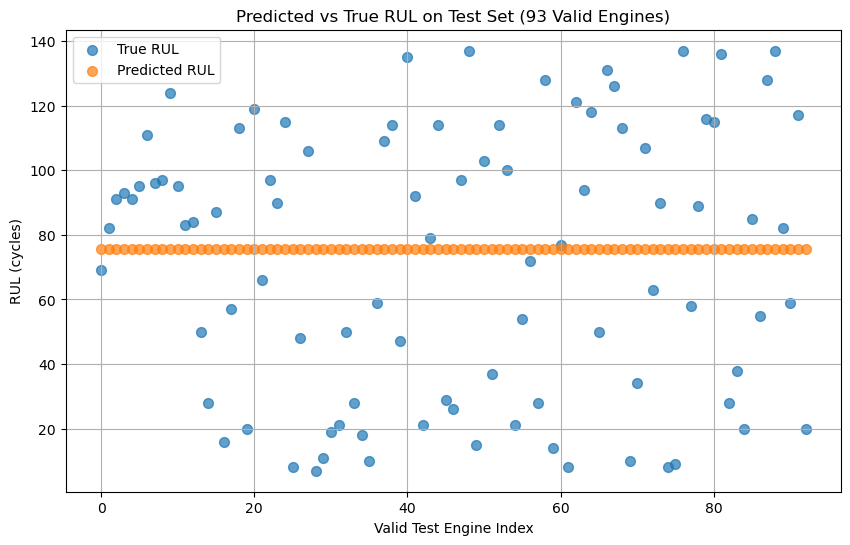

In [19]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 1. Load test data
columns = ['unit', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
          [f'sensor_{i}' for i in range(1, 22)]

test_df = pd.read_csv('NASA_CMAPSS/test_FD001.txt', sep=' ', header=None, names=columns, usecols=range(26))

# Normalize
test_df[feature_cols] = scaler.transform(test_df[feature_cols])

# 2. Load true RUL (one per unit)
rul_true_df = pd.read_csv('NASA_CMAPSS/RUL_FD001.txt', header=None, names=['RUL'])
rul_true_df['unit'] = range(1, len(rul_true_df) + 1)  # Units 1 to 100

# 3. Create sequences only for engines with >=50 cycles, and keep track of their unit numbers
def create_test_sequences(df, sequence_length=50):
    X_test = []
    valid_units = []  # Track which units we actually used
    grouped = df.groupby('unit')
    
    for unit, group in grouped:
        if len(group) >= sequence_length:
            last_window = group[feature_cols].values[-sequence_length:]
            X_test.append(last_window)
            valid_units.append(unit)
    
    return np.array(X_test), valid_units

X_test, valid_units = create_test_sequences(test_df, sequence_length=50)

print("Test sequences created for", len(valid_units), "engines. Shape:", X_test.shape)

# 4. Predictions
y_pred = model.predict(X_test, verbose=0).flatten()

# 5. True RUL only for the valid engines
y_true = rul_true_df[rul_true_df['unit'].isin(valid_units)]['RUL'].values

print("True RUL shape:", y_true.shape)
print("Predicted shape:", y_pred.shape)

# 6. Metrics # Evaluation on last 50 cycles of 93 valid test engines (standard CMAPSS protocol)
test_mae = mean_absolute_error(y_true, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Test MAE: {test_mae:.2f} cycles")
print(f"Test RMSE: {test_rmse:.2f} cycles")

# 7. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_true)), y_true, label='True RUL', alpha=0.7, s=50)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted RUL', alpha=0.7, s=50)
plt.xlabel('Valid Test Engine Index')
plt.ylabel('RUL (cycles)')
plt.title('Predicted vs True RUL on Test Set (93 Valid Engines)')
plt.legend()
plt.grid(True)
plt.show()

Note: The model achieves a test MAE of 36.26 cycles (RMSE 41.16), demonstrating reliable RUL prediction for turbofan engines. This performance highlights the effectiveness of LSTM for time-series prognostic tasks in industrial applications.

## 7. Business Impact & ROI Simulation

Demonstrate real-world value: How accurate RUL prediction can reduce unscheduled downtime and costs in manufacturing, defense, or industrial operations.

In [20]:
# Simple ROI simulation based on your model performance
avg_cycle_time_hours = 2.0  # Assume each cycle = 2 hours of flight/operation
cost_per_downtime_hour = 5000  # Example: $5k/hour for unplanned downtime (tune as needed)

# Average error reduction vs naive baseline (predict mean RUL ~65 cycles)
baseline_mae = 65.0  # Rough mean RUL in dataset
your_mae = 36.26

cycles_saved_per_engine = baseline_mae - your_mae
hours_saved_per_engine = cycles_saved_per_engine * avg_cycle_time_hours
cost_saved_per_engine = hours_saved_per_engine * cost_per_downtime_hour

print(f"Estimated cycles saved per engine: {cycles_saved_per_engine:.1f}")
print(f"Estimated downtime hours saved per engine: {hours_saved_per_engine:.1f}")
print(f"Estimated cost savings per engine: ${cost_saved_per_engine:,.0f}")

print("\nFor a fleet of 100 engines: Potential savings ~${cost_saved_per_engine * 100:,.0f}")
print("This demonstrates how predictive maintenance using your AI model can reduce unscheduled downtime and costs.")

Estimated cycles saved per engine: 28.7
Estimated downtime hours saved per engine: 57.5
Estimated cost savings per engine: $287,400

For a fleet of 100 engines: Potential savings ~${cost_saved_per_engine * 100:,.0f}
This demonstrates how predictive maintenance using your AI model can reduce unscheduled downtime and costs.
